# Automatic Crypto Website API

In [44]:
#jupyter notebook -NotebookApp.iopub_data_rate_limit=1e10
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '82b4a168-6a60-45bb-9c3f-d5e17decb012',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
type(data)

dict

In [45]:
import pandas as pd

#allows you to see all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [46]:
#converting json data to dataframe for analysis
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12294,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.991242e+07,1.991242e+07,False,NaN,1,NaN,NaN,None,2025-08-27T19:42:00.000Z,112171.379850,6.173976e+10,-22.3010,-0.106193,1.121383,-1.565683,-4.816462e+00,4.549923,6.063869,2.233603e+12,57.4526,2.355599e+12,None,2025-08-27T19:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-27 14:44:21.109697
1,1027,Ethereum,ETH,ethereum,10476,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207069e+08,1.207069e+08,True,NaN,2,NaN,NaN,None,2025-08-27T19:43:00.000Z,4575.475796,4.185828e+10,-31.8141,-0.916213,0.270216,5.595571,2.108039e+01,87.917014,73.322896,5.522916e+11,14.2060,5.522916e+11,None,2025-08-27T19:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-27 14:44:21.109697
2,52,XRP,XRP,xrp,1682,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.948226e+10,9.998582e+10,False,NaN,3,NaN,NaN,None,2025-08-27T19:43:00.000Z,3.018238,6.516326e+09,-12.0878,-0.238158,-0.065446,2.129009,-4.216142e+00,37.972202,33.648665,1.795316e+11,4.6179,3.018238e+11,None,2025-08-27T19:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-27 14:44:21.109697
3,825,Tether USDt,USDT,tether,143029,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.672055e+11,1.697342e+11,True,NaN,4,NaN,NaN,None,2025-08-27T19:42:00.000Z,1.000100,1.170655e+11,-25.9505,0.004629,-0.011349,0.004065,1.239314e-02,-0.017449,0.009785,1.672222e+11,4.3013,1.697512e+11,None,2025-08-27T19:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-08-27 14:44:21.109697
4,1839,BNB,BNB,bnb,2685,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.392872e+08,1.392872e+08,False,NaN,5,NaN,NaN,None,2025-08-27T19:42:00.000Z,862.377669,2.284154e+09,-25.0162,-0.379193,0.501488,-0.654652,3.600161e+00,33.282473,27.846085,1.201182e+11,3.0897,1.201182e+11,None,2025-08-27T19:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-27 14:44:21.109697
5,5426,Solana,SOL,solana,976,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.406744e+08,6.084739e+08,True,NaN,6,5.252369e+08,1.089213e+11,None,2025-08-27T19:43:00.000Z,207.375532,1.100351e+10,16.2350,-1.787200,5.828416,11.562882,1.201627e+01,37.252329,24.452391,1.121226e+11,2.8840,1.261826e+11,None,2025-08-27T19:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-27 14:44:21.109697
6,3408,USDC,USDC,usd-coin,30887,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.923881e+10,6.923881e+10,False,NaN,7,6.090122e+10,6.089551e+10,None,2025-08-27T19:42:00.000Z,0.999906,1.668741e+10,-22.4763,0.007215,-0.005324,-0.006661,1.083001e-02,0.004299,0.014019,6.923231e+10,1.7808,6.923231e+10,None,2025-08-27T19:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-08-27 14:44:21.109697
7,74,Dogecoin,DOGE,dogecoin,1277,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.506959e+11,1.506959e+11,True,NaN,8,NaN,NaN,None,2025-08-27T19:42:00.000Z,0.220860,1.975416e+09,-32.8088,-0.603060,1.190576,0.410192,-3.592521e+00,34.732823,2.381673,3.328278e+10,0.8561,3.328278e+10,None,2025-08-27T19:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-27 14:44:21.109697
8,1958,TRON,TRX,tron,1216,2017-09-13T00:00:00.000Z,"[me

In [47]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '82b4a168-6a60-45bb-9c3f-d5e17decb012',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    #the new data is going to be added in the original data
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df, df_append])

    #checks if the file exists
    if not os.path.isfile(r'C:\Users\tejan\DA\API.csv'):
        df.to_csv(r'C:\Users\tejan\DA\API.csv', header='column_names')
    else:
        #writes data to csv if the file exits and does not include header everytime
        df.to_csv(r'C:\Users\tejan\DA\API.csv', mode='a', header=False)

In [48]:
import os
from time import time
from time import sleep

for i in range(200):
    api_runner()
    print('API Runnger Completed')
    sleep(60)  #sleep for 1 minute
exit()

API Runnger Completed
API Runnger Completed
API Runnger Completed
API Runnger Completed
API Runnger Completed
API Runnger Completed
API Runnger Completed


KeyboardInterrupt: 

In [ ]:
df.head()

In [49]:
#reads csv file
#df_new = pd.read_csv(r'path.csv')

df_new = pd.read_csv('API.csv')
df_new.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12294,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.991242e+07,1.991242e+07,False,NaN,1,NaN,NaN,NaN,2025-08-27T19:42:00.000Z,112171.379850,6.173976e+10,-22.3010,-0.106193,1.121383,-1.565683,-4.816462,4.549923,6.063869,2.233603e+12,57.4526,2.355599e+12,NaN,2025-08-27T19:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-27 14:44:21.109697
1,1,1027,Ethereum,ETH,ethereum,10476,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.207069e+08,1.207069e+08,True,NaN,2,NaN,NaN,NaN,2025-08-27T19:43:00.000Z,4575.475796,4.185828e+10,-31.8141,-0.916213,0.270216,5.595571,21.080392,87.917014,73.322896,5.522916e+11,14.2060,5.522916e+11,NaN,2025-08-27T19:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-27 14:44:21.109697
2,2,52,XRP,XRP,xrp,1682,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.948226e+10,9.998582e+10,False,NaN,3,NaN,NaN,NaN,2025-08-27T19:43:00.000Z,3.018238,6.516326e+09,-12.0878,-0.238158,-0.065446,2.129009,-4.216142,37.972202,33.648665,1.795316e+11,4.6179,3.018238e+11,NaN,2025-08-27T19:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-27 14:44:21.109697
3,3,825,Tether USDt,USDT,tether,143029,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.672055e+11,1.697342e+11,True,NaN,4,NaN,NaN,NaN,2025-08-27T19:42:00.000Z,1.000100,1.170655e+11,-25.9505,0.004629,-0.011349,0.004065,0.012393,-0.017449,0.009785,1.672222e+11,4.3013,1.697512e+11,NaN,2025-08-27T19:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-08-27 14:44:21.109697
4,4,1839,BNB,BNB,bnb,2685,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.392872e+08,1.392872e+08,False,NaN,5,NaN,NaN,NaN,2025-08-27T19:42:00.000Z,862.377669,2.284154e+09,-25.0162,-0.379193,0.501488,-0.654652,3.600161,33.282473,27.846085,1.201182e+11,3.0897,1.201182e+11,NaN,2025-08-27T19:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-27 14:44:21.109697


In [50]:
df1 = df_new.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d']].mean()
df1.head()

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d
name,,,,,
Bitcoin,-0.145036,1.067530,-1.640647,-4.751810,4.497967
Ethereum,-1.007057,0.160212,5.492650,21.192666,87.777192
XRP,-0.273736,-0.158050,2.039078,-4.077594,37.916544
Tether USDt,0.000345,-0.004285,0.009008,0.011572,-0.021823
BNB,-0.408490,0.452810,-0.642047,3.704681,33.219334


In [11]:
df_stacked = df1.stack()
df_stacked

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.577988
             quote.USD.percent_change_24h     1.042033
             quote.USD.percent_change_7d     -1.838446
             quote.USD.percent_change_30d    -5.351158
             quote.USD.percent_change_60d     4.184561
Ethereum     quote.USD.percent_change_1h     -1.714598
             quote.USD.percent_change_24h     0.350639
             quote.USD.percent_change_7d      5.697668
             quote.USD.percent_change_30d    19.954162
             quote.USD.percent_change_60d    87.053375
XRP          quote.USD.percent_change_1h     -1.192265
             quote.USD.percent_change_24h     1.166331
             quote.USD.percent_change_7d      2.242595
             quote.USD.percent_change_30d    -4.867223
             quote.USD.percent_change_60d    37.211881
Tether USDt  quote.USD.percent_change_1h      0.071629
             quote.USD.percent_change_24h     0.067912
             quote.USD.

In [51]:
df2 = df_stacked.to_frame(name='values')
df2.head()

values
name                                          
Bitcoin quote.USD.percent_change_1h  -0.577988
        quote.USD.percent_change_24h  1.042033
        quote.USD.percent_change_7d  -1.838446
        quote.USD.percent_change_30d -5.351158
        quote.USD.percent_change_60d  4.184561

In [52]:
df3 = df2.reset_index()
df3

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.577988
1,Bitcoin,quote.USD.percent_change_24h,1.042033
2,Bitcoin,quote.USD.percent_change_7d,-1.838446
3,Bitcoin,quote.USD.percent_change_30d,-5.351158
4,Bitcoin,quote.USD.percent_change_60d,4.184561
5,Ethereum,quote.USD.percent_change_1h,-1.714598
6,Ethereum,quote.USD.percent_change_24h,0.350639
7,Ethereum,quote.USD.percent_change_7d,5.697668
8,Ethereum,quote.USD.percent_change_30d,19.954162
9,Ethereum,quote.USD.percent_change_60d,87.053375


In [53]:
df3 = df3.rename(columns = {'level_1' : 'percent_change'})
df3['percent_change'] = df3['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h',
                                                      'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d'],
                                                      ['1h', '24h', '7d','30d', '60d' ])
df3

,name,percent_change,values
0,Bitcoin,1h,-0.577988
1,Bitcoin,24h,1.042033
2,Bitcoin,7d,-1.838446
3,Bitcoin,30d,-5.351158
4,Bitcoin,60d,4.184561
5,Ethereum,1h,-1.714598
6,Ethereum,24h,0.350639
7,Ethereum,7d,5.697668
8,Ethereum,30d,19.954162
9,Ethereum,60d,87.053375


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 800x600 with 0 Axes>

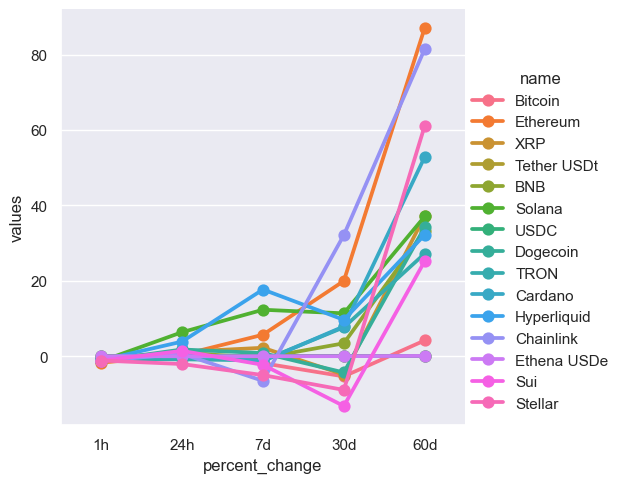

<Figure size 640x480 with 0 Axes>

In [54]:
plt.figure(figsize = (8,6))
sns.catplot(x = 'percent_change', y='values', hue='name', data=df3, kind='point')
plt.show()
plt.clf()

In [55]:
df4 = df[['name', 'quote.USD.price', 'timestamp']]
df4 = df4.query("name == 'Bitcoin'")
df4

,name,quote.USD.price,timestamp
0,Bitcoin,112171.379850,2025-08-27 14:44:21.109697
0,Bitcoin,112158.342227,2025-08-27 14:45:17.111312
0,Bitcoin,112167.236130,2025-08-27 14:46:17.333738
0,Bitcoin,112137.022975,2025-08-27 14:47:17.527326
0,Bitcoin,112079.336806,2025-08-27 14:48:17.758496
0,Bitcoin,111995.188545,2025-08-27 14:49:17.955345
0,Bitcoin,111977.690747,2025-08-27 14:50:18.226045
0,Bitcoin,111929.667630,2025-08-27 14:51:18.440541


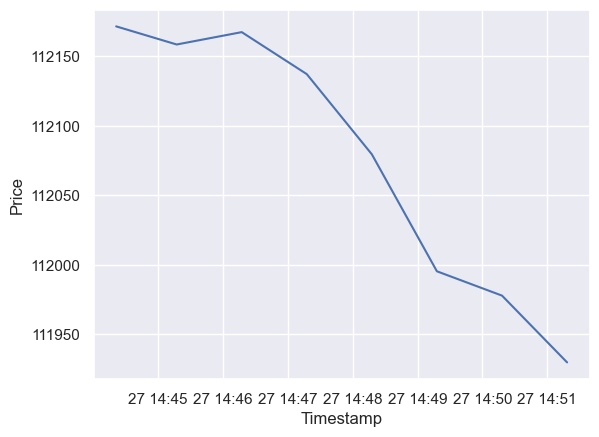

In [56]:
#line plot of bitcoin price change per minute
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data=df4)
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.show()